# Deviations from Normality

In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import scipy.stats

import risk_kit as rk


In [3]:
hfi_returns=rk.get_hfi_returns()

C:\Users\HP\risk_kit.py:25: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  hfi=pd.read_csv("edhec-hedgefundindices.csv",header=0,index_col=0,parse_dates=True)


<Axes: xlabel='date'>

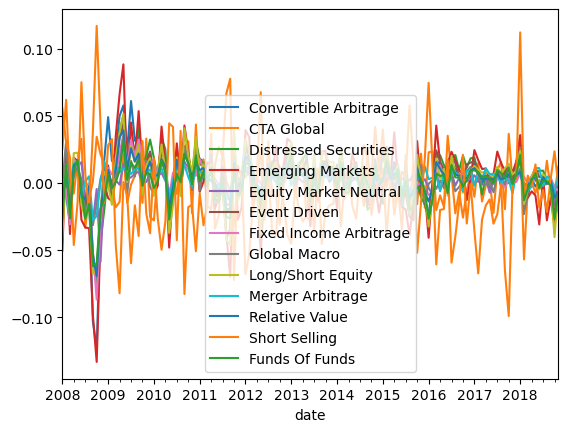

In [5]:
hfi_returns["2008":].plot()

In [8]:
#pd.concat([hfi_returns.mean(), hfi_returns.median(), hfi_returns.mean()>hfi_returns.median()])

In [11]:
pd.DataFrame({"Mean": hfi_returns.mean(),"Median": hfi_returns.median(),"Check": hfi_returns.mean()>hfi_returns.median()})

,Mean,Median,Check
Convertible Arbitrage,0.005508,0.0065,False
CTA Global,0.004074,0.0014,True
Distressed Securities,0.006946,0.0089,False
Emerging Markets,0.006253,0.0096,False
Equity Market Neutral,0.004498,0.0051,False
Event Driven,0.006344,0.0084,False
Fixed Income Arbitrage,0.004365,0.0055,False
Global Macro,0.005403,0.0038,True
Long/Short Equity,0.006331,0.0079,False
Merger Arbitrage,0.005356,0.0060,False


In [16]:
rk.skewness(hfi_returns).sort_values()

Fixed Income Arbitrage   -3.917868
Convertible Arbitrage    -2.624552
Equity Market Neutral    -2.112330
Relative Value           -1.805125
Event Driven             -1.401124
Merger Arbitrage         -1.312562
Distressed Securities    -1.293430
Emerging Markets         -1.160418
Long/Short Equity        -0.388003
Funds Of Funds           -0.359722
CTA Global                0.172709
Short Selling             0.763599
Global Macro              0.977321
dtype: float64

In [18]:
scipy.stats.skew(hfi_returns)

array([-2.63959223,  0.17369864, -1.30084204, -1.16706749, -2.12443538,
       -1.40915356, -3.94032029,  0.98292188, -0.39022677, -1.32008333,
       -1.81546975,  0.76797484, -0.36178308])

In [20]:
hfi_returns.shape

(263, 13)

In [21]:
normal_rets=np.random.normal(0, 0.15, size=(263,1))
rk.skewness(normal_rets)

-0.011292310555442919

In [23]:
rk.kurtosis(hfi_returns).sort_values()

CTA Global                 2.930547
Long/Short Equity          4.489556
Global Macro               5.698099
Short Selling              6.071337
Funds Of Funds             7.016490
Distressed Securities      7.830098
Event Driven               7.974835
Merger Arbitrage           8.672620
Emerging Markets           9.180574
Relative Value            12.029207
Equity Market Neutral     17.087865
Convertible Arbitrage     23.104130
Fixed Income Arbitrage    29.615694
dtype: float64

In [25]:
rk.kurtosis(normal_rets)

2.755581672617926

In [26]:
scipy.stats.kurtosis(normal_rets)   #scipy kurtosis gves excess kurtosis whereas our function kurtosis gives normal kurtosis

array([-0.24441833])

In [27]:
scipy.stats.jarque_bera(normal_rets)

SignificanceResult(statistic=0.6602437899194118, pvalue=0.7188361055932122)

In [28]:
scipy.stats.jarque_bera(hfi_returns)

SignificanceResult(statistic=25656.585999171337, pvalue=0.0)

In [29]:
rk.is_normal(hfi_returns)

False

In [31]:
hfi_returns.aggregate(rk.is_normal)

Convertible Arbitrage     False
CTA Global                 True
Distressed Securities     False
Emerging Markets          False
Equity Market Neutral     False
Event Driven              False
Fixed Income Arbitrage    False
Global Macro              False
Long/Short Equity         False
Merger Arbitrage          False
Relative Value            False
Short Selling             False
Funds Of Funds            False
dtype: bool

In [33]:
ffme_returns=rk.get_ffme_returns()
rk.kurtosis(ffme_returns)

SmallCap    46.760640
LargeCap    10.675393
dtype: float64

In [34]:
rk.skewness(ffme_returns)

SmallCap    4.404779
LargeCap    0.233130
dtype: float64

In [36]:
ffme_returns.aggregate(rk.is_normal)

SmallCap    False
LargeCap    False
dtype: bool